In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np

In [100]:
file = '/Users/ballanr/Desktop/File Outputs/DR13/DR13 Protostars.csv'
openfile = pd.read_csv(file)
x1 = openfile['Model Temp']
x = np.log(x1)

y = openfile['Model Density']

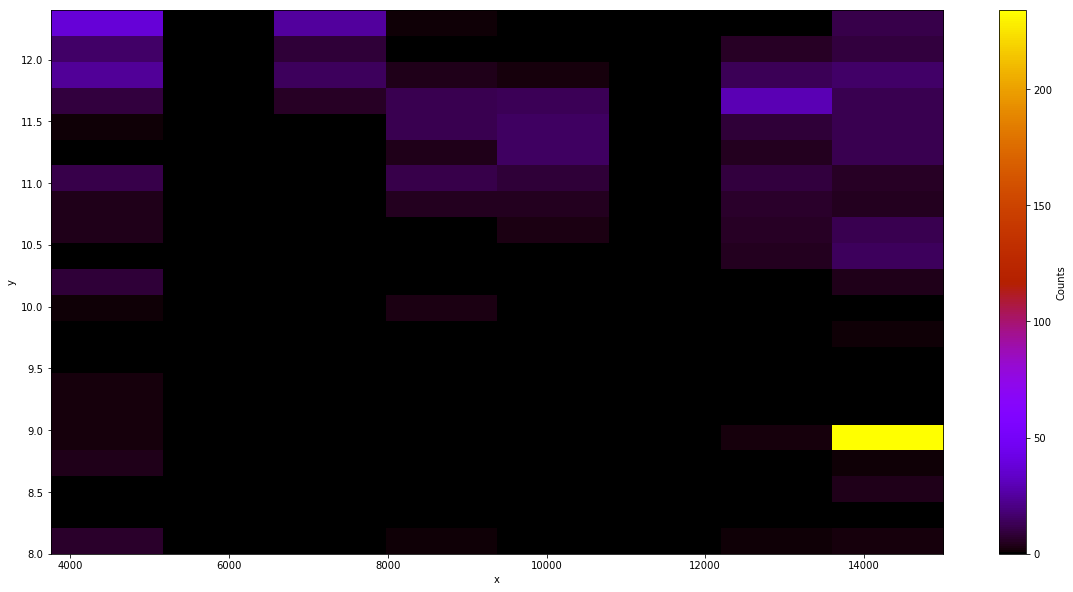

In [30]:
plt.figure(figsize=(20,10))
plt.hist2d(x1, y,bins=(8,21),cmap='gnuplot')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()

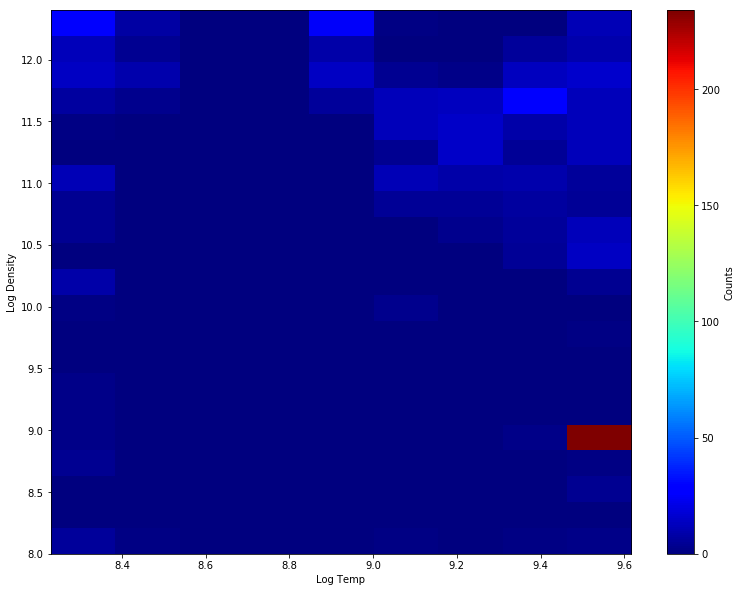

In [94]:
plt.figure(figsize=(13,10))
plt.hist2d(x, y,bins=(9,21),cmap='jet')
plt.xlabel('Log Temp')
plt.ylabel('Log Density')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
#plt.savefig('/Users/ballanr/Desktop/2D Hist.pdf',dpi=300)
plt.show()

In [17]:
import corner
import numpy as np

In [32]:
z=np.column_stack((x, y))
z1 = np.column_stack((x1,y))

In [101]:
ye = np.exp(y)


In [103]:
ze = np.column_stack((x1,ye))

In [95]:
fig = corner.corner(z,smooth=1,bins=(9,23),labels=['Log Temp','Log Density'],
                   quantiles=[0.5])
fig
fig.savefig('corner.pdf')

In [111]:
fig1 = corner.corner(z1,smooth=1,bins=(9,23),labels=['Temp','Log Density'],
                   quantiles=[0.5])
fig1
fig1.savefig('corner1.pdf')

In [110]:
fig2 = corner.corner(ze,smooth=2,bins=(9,23),labels=['Temp','Density'],
                   quantiles=[0.25,0.5,0.75])
fig2
fig2.savefig('corner2.pdf')

In [62]:
plt.clf()
plt.close()

In [68]:
zmult = x*y

In [75]:
min(zmult),max(zmult),len(zmult)

(65.836088951715652, 119.23598795304591, 754)

In [86]:
xz = np.asarray(np.linspace(65,120,754))
zz = np.column_stack((xz,z))

In [87]:
corner.corner(zz,bins=(8,10))

ValueError: Dimension mismatch between bins and range

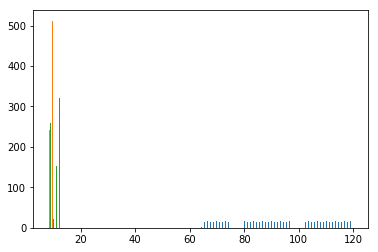

In [84]:
plt.hist(zz,bins=100)
plt.show()

In [151]:
def BrackettDR13(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR13/DR13 Protostars.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.plot(brx,equivs)
                    plt.scatter(brx,equivs)
                    plt.plot(brx,tempy)
                    plt.scatter(brx,tempy)
                    plt.show()

In [174]:
def Brackett_noweight(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR15/Catalog-test1.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.plot(brx,equivs)
                    plt.scatter(brx,equivs)
                    plt.plot(brx,tempy)
                    plt.scatter(brx,tempy)
                    plt.show()

In [175]:
def Brackett_weight(input1,input2,input3):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import itertools
    file = '/Users/ballanr/Desktop/File Outputs/DR15/pre-DR15.csv'
    openfile = pd.read_csv(file)
    for index,row in itertools.islice(openfile.iterrows(),0,None):

        plate = str(int(row['Plate ID']))

        if plate == input1:

            mjd = str(int(row['MJD']))

            if mjd == input2:

                fiber = str(row['Fiber'])

                if len(str(fiber)) == 3:
                    fiber = str(fiber)
                elif len(str(fiber)) == 2:
                    fiber = '0' + str(fiber) 
                else:
                    fiber = '00' + str(fiber)

                if fiber == input3:

                    density = str(row['Model Density'])
                    #if density == '8' or density == '9' or density == '10' or density == '11' or density == '12':
                    #    density = density + str(.0)

                    temp = str(int(row['Model Temp'])) + ' K'
                    print(density,temp)
                    equivs = np.asarray((row['Br11 EqW'],row['Br12 EqW'],row['Br13 EqW'],row['Br14 EqW'],row['Br15 EqW'],
                             row['Br16 EqW'],row['Br17 EqW'],row['Br18 EqW'],row['Br19 EqW'],row['Br20 EqW']))

                    equivs = equivs / equivs[0]

                    filename = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density) + ' Ratios.csv'
                    openfile1 = pd.read_csv(filename)

                    brx = openfile1['Br Line']
                    tempy = openfile1[temp]
                    tempy = tempy/tempy[0]

                    plt.figure(figsize=(18,10))
                    plt.plot(brx,equivs)
                    plt.scatter(brx,equivs)
                    plt.plot(brx,tempy)
                    plt.scatter(brx,tempy)
                    plt.show()

12.0 3750 K


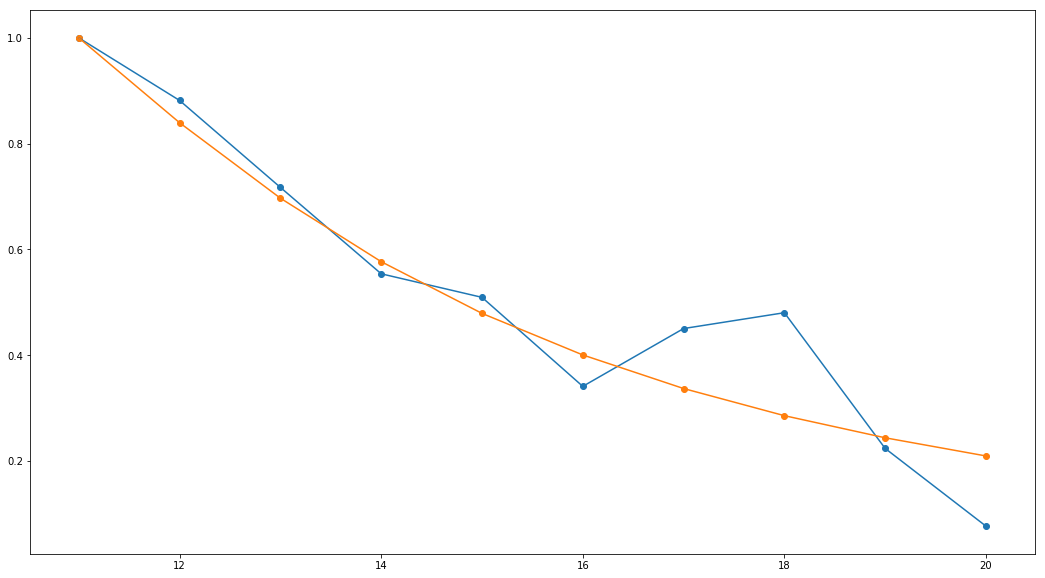

In [183]:
Brackett_weight('9288','57738','003')

11.0 8750 K


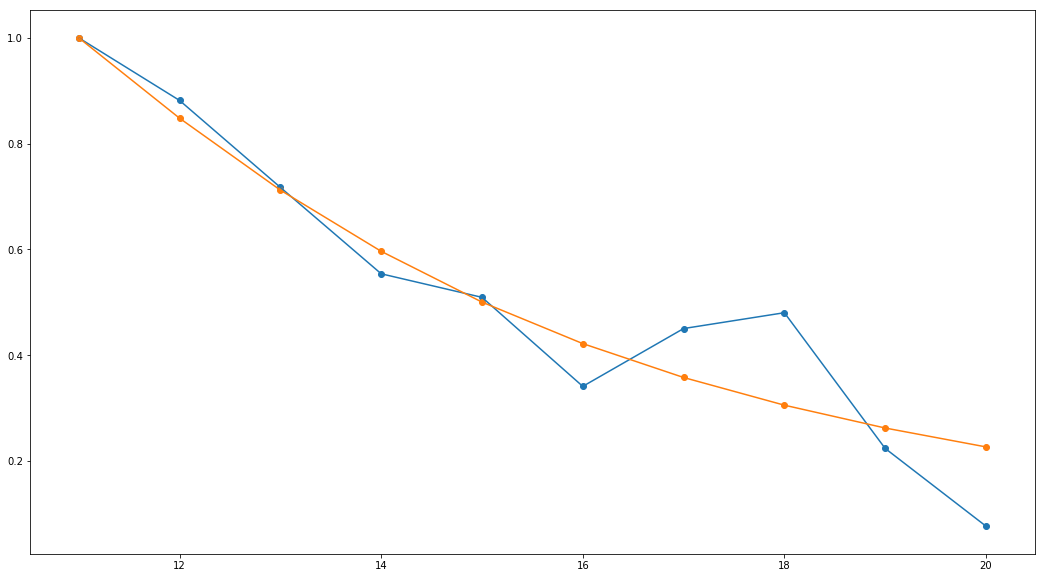

In [184]:
Brackett_noweight('9288','57738','003')

11.4 8750 K


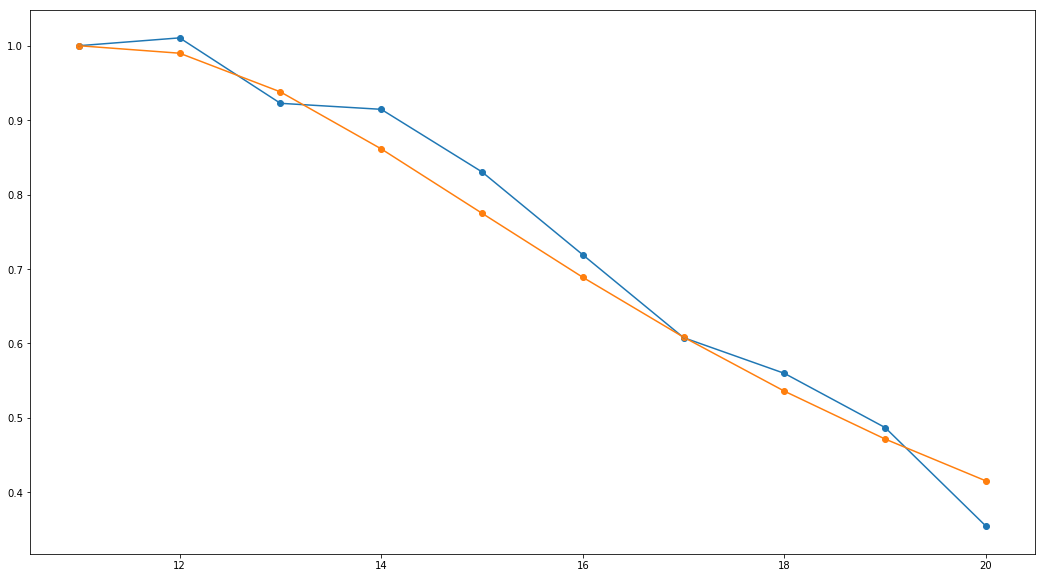

In [157]:
BrackettDR13('7200','56670','196')

In [130]:
plt.clf()
plt.close()